# University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence
Cameron Savoury - 2719114

Bruce Spence - 2721301
    
# Programming Assignment

## Part 1: Optimisation and Heuristic Search    

Imagine that you are an art collector who has accumulated many pictures, each of them has been valued and has a price in pounds.
You are running out of storage space and you have decided to give away 50 of your pictures.

You have two friends Anne and Bob, and you want to split your pictures fairly between them.

Fair here means that the total value of the pictures given to Ann and Bob should be similar.  The number of pictures each receives can be different, but the total value each receives should be as close as possible.

Your task is to formulate this problem as an optimisation problem and solve it using a heuristic search method. You are allowed to use only these Python libraries: pandas, csv, matplotlib, math, random, numpy

# Describe in text form how you will encode a potential solution to this problem (ie the data structure), and what this encoding represents.

I will encode a solution to this by first randomly generating two binary vectors which represent a set of paintings for Anne and a set for Bob. This will be generated by first making a random selection out of the 50 paintings and assigning them to Anne and applying the opposite to Bob.

Then I will run a hill climbing algorithm with a specified number of cycles on Annes set of paintings, updating Bobs also with  an opposing value for each change, comparing both sets of paintings and their values through use of an evaluation method which is discussed below and finally keeping track of the incremental improvements that the model makes.

# Describe in text form what will be a good metric to quantify the quality of a candidate solution to the problem

To determine if one solution is better than another I have come up with a way to determine how fairly distributed the values of the paintings are, as per the brief the value of each set of paintings has to be as low as possible. With this in mind my method for quantifying the quality of a solution is to sum the value of both sets of paintings and calculate the difference in value between each set. The lower the difference in value, the more effective a model is, regardless of number of paintings in each set.

In [3]:
#Import the spreadsheet and retrieve all painting values in order
import csv
values = []

file = open('values50.csv')
csv_reader = csv.reader(file)
next(csv_reader)

values = next(csv_reader) #Assign values obtained from excel sheet to array named values
values = list(map(int, values)) #Map to integers and not strings, this prevents issues with summing total values
nOfPaintings = len(values) #Variable to store the number of paintings

print(values)

[281783, 132345, 534919, 247294, 1039003, 942652, 990371, 796111, 440308, 196838, 1023110, 59449, 817489, 907579, 4417, 934045, 558536, 479750, 214386, 665699, 64152, 46813, 53364, 19305, 799444, 454242, 885243, 60903, 464922, 918317, 1039794, 488814, 724987, 484163, 458818, 963859, 607717, 45068, 872793, 209716, 389874, 621576, 253525, 697713, 885223, 398144, 636210, 595926, 1047239, 824923]


In [4]:
import random as rnd

#Generate a random solution

#Equal chance to the 0 and 1s
#Output: a random solution 
def random_sol():
    sol = rnd.choices([0,1], k=nOfPaintings)  #This create a random binary list of n elements, where n is the number of paintings, defined above
    return sol

print('sol is: ', random_sol())

sol is:  [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [5]:
#Create an array which is the comlete opposite of the random generated solution - symbolising other set of paintings
#Output: Solution opposite to the one passed in
def oppositePaintings(sol):
    oppPaint = [] #list to store opposite solution from the one passed above
    for i in range(nOfPaintings):
        oppPaint.append(0) if sol[i]== 1 else oppPaint.append(1) #If original solution is 1 then opposite will be 0 and vice versa
    return oppPaint 

thisSol = random_sol()
print('solution is: ', thisSol)

print('\nopposite is: ', oppositePaintings(thisSol))

solution is:  [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]

opposite is:  [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]


In [6]:
#Function to calculate the monetary difference between both sets of paintings, The lower the difference, the fairer the distribution of the paintings is
#Input: solution as binary vector, and opposite solution also as binary vector
#Output: int representing difference in value between both sets of paintings
def evaluate(sol,oppPaint):
    value1 = 0
    value2 = 0
    difference = 0
    
    for i in range(nOfPaintings): #Get values by comparing instances of 1's to their values from the excel spreadsheet passed above
        if sol[i]== 1:
            value1 = value1 + values[i]
        if oppPaint[i]== 1:
            value2 = value2 + values[i]
        
    
    if value1 > value2: #Calculates difference in values
        difference = value1 - value2
    else:
        difference = value2 - value1
    
    return difference

thisSol = random_sol()
oppPaint = oppositePaintings(thisSol)

print('initial solution: ', thisSol)
print('\nflipped solution: ', oppPaint)
print('\nDifference between both solutions: ', evaluate(thisSol,oppPaint))

initial solution:  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]

flipped solution:  [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Difference between both solutions:  7043757


In [7]:
#Generate a random 1-bit flip neigbour of the given solution
#Input: solution as binary vector
#Output: Solution in the 1-bit flip neighbourhood
def neighbour(sol):   
    neig = sol[:]# copy solution
    i = rnd.randint(0,nOfPaintings-1) #Randomly select a position to modify
    neig[i] = 0 if sol[i]== 1 else 1  #Alter position i if 0 assign 1,else assign 1
    return neig

thisSol = random_sol()
oppPaint = oppositePaintings(thisSol)

print('initial solution: ', thisSol)
print('\nflipped solution: ', oppPaint)

print('\nNeighbour value: ', neighbour(thisSol))

initial solution:  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]

flipped solution:  [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

Neighbour value:  [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]


In [10]:
#First improvement random mutation, hill-climbing
#Input: integer with the number of iterations to run
#Output: The solution at the end of hill-climing

finalTrace = [] #A trace of the improvements found during the hill-climbing process to be used later in showing progress of hill-climb

def hill_climbing(maxiter):
    finalTrace.clear() #Clear as it may have values from previous runs otherwise
    trace = []     #To keep the trace of the improvements found during the hill-climbing process
    sol = random_sol() #Random solution using above method
    oppSol = oppositePaintings(sol) #Opposite of the solution just generated using above method
    diff = evaluate(sol,oppSol) #Caluclate the differences in both above solutions, store in variable
    finalTrace.append(diff) #Add to array to keep track of improvements in global variable
    trace.append(diff) #Add to array to keep track of improvements in localised variable
    for i in range (maxiter): #For specified number of iterations
        
        #print('------------------------------------------------------------------------------------------------------------------')
        #pint('\nInitial solution: ', sol)
        #print('\nFlipped solution: ', oppSol)
        #print('\nInitial difference: ', diff)
        
        solNeig = neighbour(sol) #Use above method to randomly flip one element
        oppSolNeig = oppositePaintings(solNeig) #Get opposite of changed solution
        diff1 = evaluate(solNeig,oppSolNeig) #Evaluate new solutions and store difference between these
        
        #print('\n\nNeighbour solution: ', solNeig)
        #print('\nFlipped neighbour solution: ', oppSolNeig)
        #print('\nDifference with neighbour: ', diff1)
        
        if diff1 <= diff: #Compare, is the difference in new solutions lower (more fairly split)?
            diff = diff1 #if yes, assign all variables to new found solutions and repeat until number of iterations reched
            sol = solNeig[:]
            finalTrace.append(diff) #Keep trace of new difference amount from new solutions
            trace.append(diff) #See above
            
    #print('Increments: ', trace)
    
    return sol

hill_climbing(5)

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1]


Anne Summary:

Anne Final Solution:  [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]

Anne Final Painting Selections:  [1, 3, 4, 5, 8, 9, 12, 13, 16, 18, 20, 22, 23, 25, 26, 27, 28, 31, 32, 37, 41, 43, 44, 45, 46, 47, 48]

Anne Final Value: £ 13639461

----------------------------------------------------------------------------------------------------------------------------

Bob Summary:

Bob Final Solution:  [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]

Bob Final Painting Selections:  [0, 2, 6, 7, 10, 11, 14, 15, 17, 19, 21, 24, 29, 30, 33, 34, 35, 36, 38, 39, 40, 42, 49]

Bob Final Value: £ 13639410

----------------------------------------------------------------------------------------------------------------------------

Final Summary:

Final Difference: £ 51
Annes painting

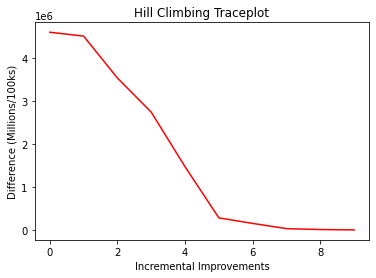

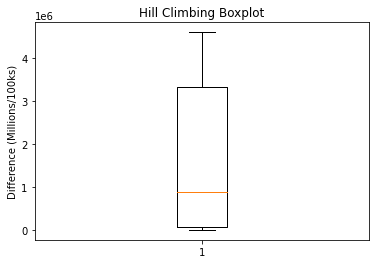

In [15]:
import matplotlib.pyplot as plt
#Method to display all results found from specified number of runs
#Input: integer with the number of iterations to run
#Output: Summary of distribution of paintings, also informative graphs showing how the final solution was reached
def finalResults(hillClimbIters):
    #Instance variables
    Anne = hill_climbing(hillClimbIters) #Assign Anne first solution (1 set of paintings devised by hill climb algorithm according to specified number of iterations)
    Bob = oppositePaintings(Anne) #Assign opposite solution to Bob (remaining set of paintings)
    AnneValue = 0
    BobValue = 0
    AnnePaintingNumbers = []
    BobPaintingNumbers = []
    AnneBetterOff = 0
    
    
    
    for i in range(nOfPaintings): #Calculate total values of each set of paintings and assign to respective variables
        if Anne[i]== 1:
            AnneValue = AnneValue + values[i]
        if Bob[i]== 1:
            BobValue = BobValue + values[i]
            
    for i in range(nOfPaintings): #Find what paintings each selected by simply storing the value of 'i' when a 1 is detected (i will represent which painting is currently selected and 1 means they have that in their set of paintings)
        if Anne[i]== 1:
            AnnePaintingNumbers.append(i)
        if Bob[i]== 1:
            BobPaintingNumbers.append(i)
    
    #Display information for Anne
    print('\nAnne Summary:')
    print('\nAnne Final Solution: ', Anne)
    print('\nAnne Final Painting Selections: ',AnnePaintingNumbers)
    print('\nAnne Final Value: £', AnneValue)
    
    print('\n----------------------------------------------------------------------------------------------------------------------------')
    
    #Display information for Bob
    print('\nBob Summary:')
    print('\nBob Final Solution: ', Bob)
    print('\nBob Final Painting Selections: ',BobPaintingNumbers)
    print('\nBob Final Value: £', BobValue)
    
    print('\n----------------------------------------------------------------------------------------------------------------------------')
    
    #Display summary information
    print('\nFinal Summary:')
    
    if AnneValue > BobValue: #If Annes paintings are worth more
        difference = AnneValue - BobValue
        AnneBetterOff = 1 #Set to 1 for true
    else:
        difference = BobValue - AnneValue #Bobs paintings must be worth more
    
    print('\nFinal Difference: £', difference)
    if AnneBetterOff == 1:
        print('Annes paintings are more valuable\n')
    else:
        print('Bobs paintings are more valuable\n')

    print(finalTrace) #Print the final trace from hillclimb
    
    #Plot and display traceplot
    traceplot = plt.figure(1)
    plt.plot(finalTrace,color='red')
    plt.title("Hill Climbing Traceplot")
    plt.ylabel('Difference (Millions/100ks)')
    plt.xlabel('Incremental Improvements')
    
    #Plot and display boxplot
    box = plt.figure(2)
    plt.title("Hill Climbing Boxplot")
    plt.ylabel("Difference (Millions/100ks)")
    plt.boxplot(finalTrace);
    
finalResults(50)